In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
data= pd.read_csv("C:/Users/Dell/Downloads/Linear_Regression/linear regression/train_cleaned.csv")

In [3]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


### Segretting the data set into dependent and independent variables 

In [4]:
x=data.drop('Item_Outlet_Sales',axis=1)
y=data['Item_Outlet_Sales']

In [5]:
x.shape

(8523, 45)

In [6]:
y.shape

(8523,)

### Splitting the dataset into train and test

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [8]:
x_train.shape

(6392, 45)

In [9]:
x_test.shape

(2131, 45)

In [10]:
y_train.shape

(6392,)

In [11]:
y_test.shape

(2131,)

### import the linear regression model 

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

In [13]:
model=LinearRegression()

In [14]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
test_predict=model.predict(x_test)

In [16]:
MAE=mae(y_test,test_predict)
print('mean_absolute_error of Test data:',MAE)

mean_absolute_error of Test data: 841.4433897326237


In [17]:
train_predict=model.predict(x_train)

In [18]:
MAE_train=mae(y_train,train_predict)
print("mean_absolute_error of Test data :",MAE_train)

mean_absolute_error of Test data : 834.1280713687805


In [19]:
## Coeffiecient of the dependent variable 
model.coef_

array([  -3.30155685,  -38.38398718,   15.38604544,  -17.43156305,
        -96.17619051,  -20.32785154,   20.17948558,  204.15528835,
       -107.83073189,   23.98939808,   18.293611  ,   66.24984548,
         68.1924627 ,  -60.67845511,    2.18721429,   18.96621236,
        -42.33765002,  -41.3923336 ,  -52.90372524,   39.13155387,
        -88.77167751,  248.99752433,  -30.98090061,  -51.08474428,
       -117.85833574, -484.84768702,  -35.0488904 ,  148.47823247,
        -46.78767075, -473.10591448,  585.59999031,  173.94644544,
       -115.91254359,  294.94631102,  -47.268273  ,  -35.0488904 ,
        491.54404656,   -4.21315802, -225.42787646,  206.51213432,
         18.91574214, -957.9536015 ,  419.14128194,  -46.78767075,
        585.59999031])

### Plotting the Coefficient

Text(0.5, 1.0, 'Coefficient Plot')

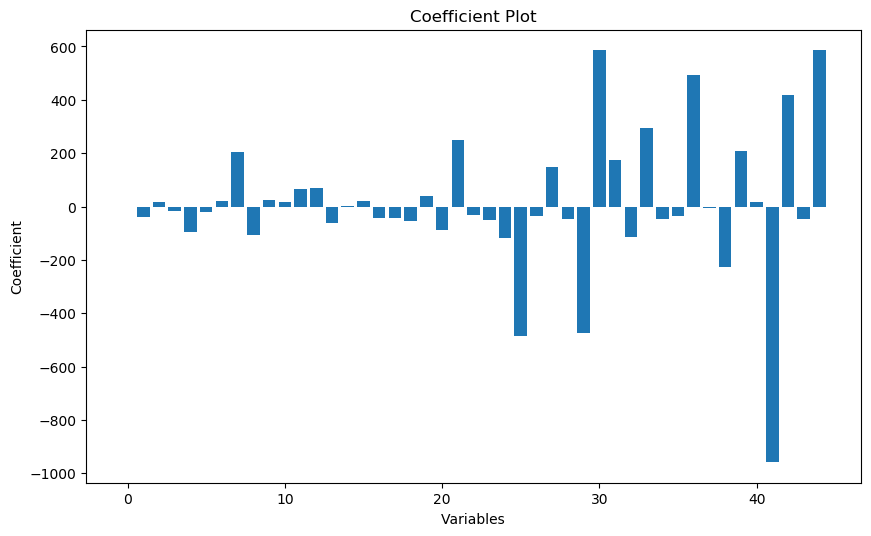

In [20]:
plt.figure(figsize=(10,6),dpi=100)
x=range(len(x_train.columns))
y= model.coef_
plt.bar(x,y)
plt.xlabel("Variables")
plt.ylabel("Coefficient")
plt.title("Coefficient Plot")



Here we can see that the model depends upon some Independent variables toos much, But these coefficients are not suitable for interpretation because these are not scaled, therefore we will perform the interpretation in this note book later.

## Checking assumptions of Linear Model

In [21]:
# calculating the residuals
residuals=pd.DataFrame({"Actaul value":y_test,
                        "Predicted value":test_predict})

In [22]:
residuals['residuals_error']=residuals['Actaul value'] - residuals['Predicted value']

In [23]:
residuals

,Actaul value,Predicted value,residuals_error
4238,1018.6740,495.559928,523.114072
4209,175.7712,771.997448,-596.226248
1528,2220.4430,1257.796094,962.646906
8505,2117.2440,3044.109995,-926.865995
6584,151.1366,498.739503,-347.602903
...,...,...,...
4598,7150.6920,5174.847370,1975.844630
3236,818.9340,1595.278325,-776.344325
8212,1981.4208,2486.060259,-504.639459
1767,3142.5760,3079.479484,63.096516


### Plotting residual curve (Is there constant Variance OR Homoscedastic?)


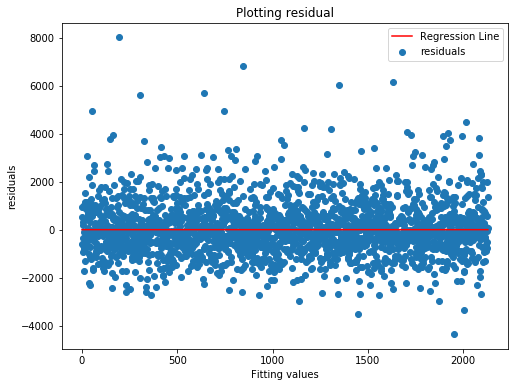

In [24]:
plt.figure(figsize=(8,6))
f=range(0,2131)
k=[0 for i in range(0,2131)]
plt.scatter(f,residuals.residuals_error[:],label='residuals')
plt.plot(f,k, color='red',label='Regression Line')
plt.xlabel('Fitting values')
plt.ylabel('residuals')
plt.title("Plotting residual")
plt.legend()


The Residual plot clearly Looks Homoscedastic, i.e. the the variance of the error across the dataset is nearly constant.

### Checking Distribution of Residuals

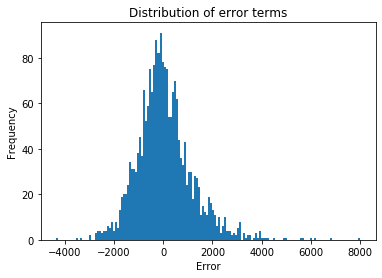

In [25]:
plt.hist(residuals.residuals_error,bins=150)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Distribution of error terms")
plt.show()

According to the Histogram, the distribution of error is nearly normal, But there are some outliers on the Higher end of the errors.

### QQ-Plot (Is the data Normally Distributed?)

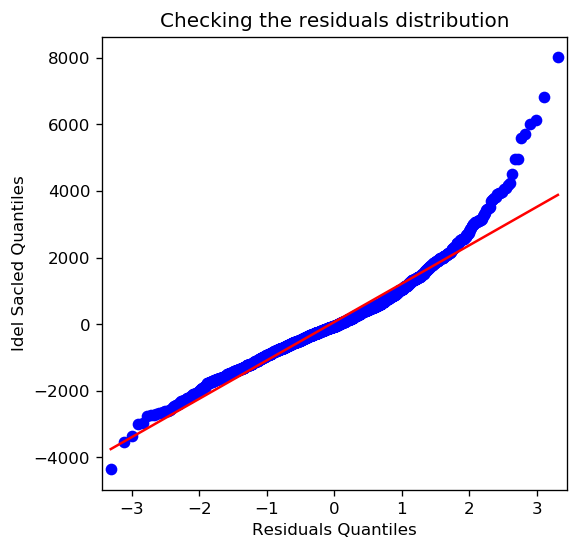

In [26]:
from statsmodels.graphics.gofplots import qqplot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals_error, line='s',ax=ax)
plt.xlabel("Residuals Quantiles")
plt.ylabel("Idel Sacled Quantiles")
plt.title("Checking the residuals distribution")
plt.show()

The QQ-plot clearly verifies our findings from the the histogram of the residuals, the data is mostly normal in nature, but there sre some outliers on the higher end of the Residues.

From the ACF plot, we can clearly see that there is almost negligible correlation between the error terms. Hence there is no autocorrelation present in the data.

### Variance Inflation Factor (VIF) (Checking for multi collinearity)

In [27]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index =data.columns)
VIF

C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Item_Weight                        2.349925
Item_Visibility                    1.101456
Item_MRP                           1.753170
Outlet_Establishment_Year               inf
Item_Outlet_Sales                  2.292720
Item_Fat_Content_LF                     inf
Item_Fat_Content_Low Fat                inf
Item_Fat_Content_Regular                inf
Item_Fat_Content_low fat                inf
Item_Fat_Content_reg                    inf
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood               

From this list, we clearly see that there happens to be no Independent Variable over the value of 5, which means that there are no features that exhibit the Multicollinearity in the dataset. Note that VIF only works for the Continuous Variables.

### Model Interpretability
So far we have simply been predicting the values using the linear regression, But in order to Interpret the model, the normalising of the data is essential.

In [28]:
model=LinearRegression(normalize=True)

In [29]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [30]:
test_predict_norm=model.predict(x_test)

In [31]:
MAE_test_nor=mae(y_test,test_predict_norm)
print(" Nomralized the test Mean Absolute error:",MAE_test_nor)

 Nomralized the test Mean Absolute error: 864.4404633505397


In [32]:
train_predict_norm=model.predict(x_train)

In [33]:
mae_train_nor= mae(y_train,train_predict_norm)
print(" Nomralized the test Mean Absolute error:",mae_train_nor)

 Nomralized the test Mean Absolute error: 860.7772298185231


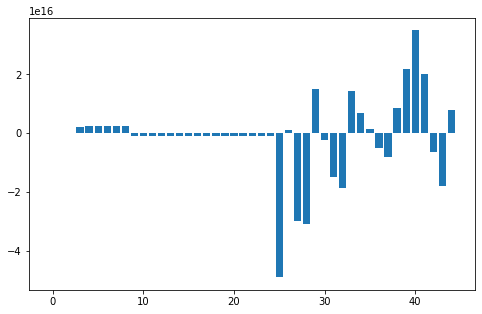

In [34]:
plt.figure(figsize=(8,5))
x=range(len(x_train.columns))
y=model.coef_
plt.bar(x,y)
plt.show()

Now the coefficients we see are normalised and we can easily make final inferences out of it.

Here we can see that there are a lot of Coefficients which are near to zero and not Significant. So let us try removing them and build the model again.


#### Creating new subsets of data

In [35]:
#seperating independent and dependent variables
x=data.drop(["Item_Outlet_Sales"],axis=1)
y=data['Item_Outlet_Sales']

In [36]:
x.shape,y.shape

((8523, 45), (8523,))

### Arrange the coefficeient with features

In [37]:
coff_data=pd.DataFrame({"Features":x.columns,
                       "COfficients":model.coef_})

In [38]:
coff_data.head()

,Features,COfficients
0,Item_Weight,-3.519930e+00
1,Item_Visibility,-2.024590e+02
2,Item_MRP,1.540546e+01
3,Outlet_Establishment_Year,2.270504e+15
4,Item_Fat_Content_LF,2.454814e+15


 ###### we are going to select the feature column which  having only the coeff greater than 0.5(Our wish)

In [39]:
coff_gr_5=coff_data[coff_data.COfficients>1.5]

In [40]:
coff_gr_5.count()#.head()

Features       17
COfficients    17
dtype: int64

In [41]:
coff_gr_5.head()

,Features,COfficients
2,Item_MRP,1.540546e+01
3,Outlet_Establishment_Year,2.270504e+15
4,Item_Fat_Content_LF,2.454814e+15
5,Item_Fat_Content_Low Fat,2.454814e+15
6,Item_Fat_Content_Regular,2.454814e+15


#### Extracting the significant subset do independent Variables

In [42]:
subset=data[coff_gr_5['Features'].values]

In [43]:
subset.head()

,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Identifier_OUT013,Outlet_Identifier_OUT019,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3
0,249.8092,1999,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
1,48.2692,2009,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,141.6180,1999,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
3,182.0950,1998,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
4,53.8614,1987,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0


In [44]:
x_train,x_test,y_train,y_test=train_test_split(subset,y)

In [45]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6392, 17), (2131, 17), (6392,), (2131,))

In [46]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [47]:
model=LinearRegression(normalize=True)
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [48]:
test_predict_norm_coff=model.predict(x_test)

In [49]:
mae_test_predict_norm_coff=mae(y_test,test_predict_norm_coff)
print("Nomralized coeff test Mean Absolute error :",mae_test_predict_norm_coff)

Nomralized coeff test Mean Absolute error : 815.0405203098044


In [50]:
train_predict_norm_coff=model.predict(x_train)

In [53]:
mae_train_predict_norm_coff=mae(y_train,train_predict_norm_coff)
print("Nomralized coeff train Mean Absolute error :",mae_train_predict_norm_coff)

Nomralized coeff train Mean Absolute error : 843.534397052796


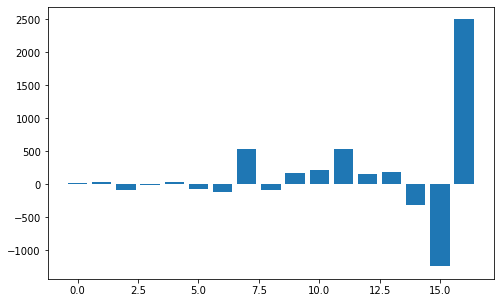

In [52]:
plt.figure(figsize=(8,5))
x=range(len(subset.columns))
y=model.coef_
plt.bar(x,y)
plt.show()